## Step 3 - Climate Analysis and Exploration

You are now ready to use Python and SQLAlchemy to do basic climate analysis and data exploration on your new weather station tables. All of the following analysis should be completed using SQLAlchemy ORM queries, Pandas, and Matplotlib.

* Create a Jupyter Notebook file called `climate_analysis.ipynb` and use it to complete your climate analysis and data exploration.

* Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.

* Use SQLAlchemy `create_engine` to connect to your sqlite database.

* Use SQLAlchemy `automap_base()` to reflect your tables into classes and save a reference to those classes called `Station` and `Measurement`.


In [1]:
#Import Dependencies

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
import datetime as dt
import pandas as pd
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt
from sqlalchemy import Column, Integer, String, Float, Text, ForeignKey
import numpy as np

In [2]:
#Use SQLAlchemy create_engine to connect to your sqlite database.

engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
#Use SQLAlchemy automap_base() to reflect your tables into classes and save a reference to those classes called Station and Measurement

Base = automap_base()

In [4]:
Base.prepare(engine, reflect=True)

In [5]:
Base.classes.keys()

['measurements', 'station']

In [6]:
inspector = inspect(engine)

In [7]:
inspector.get_table_names()

['measurements', 'station']

In [32]:
#Reflect Database into ORM class

station = Base.classes.station
measurements = Base.classes.measurements

In [10]:
#Initiate session to query database

session = Session(engine)

### Precipitation Analysis

* Design a query to retrieve the last 12 months of precipitation data.

* Select only the `date` and `prcp` values.

* Load the query results into a Pandas DataFrame and set the index to the date column.

* Plot the results using the DataFrame `plot` method.

* Use Pandas to print the summary statistics for the precipitation data.

In [14]:
#Design a query to retrieve the last 12 months of precipitation data.

date_last = session.query(measurements.date).order_by(measurements.date.desc()).first()

('2017-08-23')

In [13]:
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

rain = session.query(measurements.date, measurements.prcp).\
    filter(measurements.date > last_year).\
    order_by(measurements.date).all()

('2017-08-23',)
2016-08-23


In [18]:
#Load the query results into a Pandas DataFrame and set the index to the date column
rain_df = pd.DataFrame(rain)
#rain_df.head()
rain_df.set_index('date').head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,0.00
2016-08-24,1.22


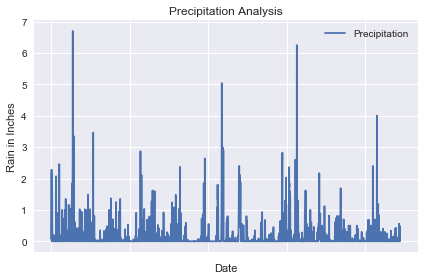

In [19]:
#plot
rain_df.plot('date', 'prcp')
plt.xlabel("Date")
plt.ylabel("Rain in Inches")
plt.title("Precipitation Analysis")
plt.legend(["Precipitation"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Station Analysis

* Design a query to calculate the total number of stations.

* Design a query to find the most active stations.

  * List the stations and observation counts in descending order

  * Which station has the highest number of observations?

* Design a query to retrieve the last 12 months of temperature observation data (tobs).

  * Filter by the station with the highest number of observations.

  * Plot the results as a histogram with `bins=12`.

In [22]:
#Design a query to calculate the total number of stations.

station_count = session.query(measurements).group_by(measurements.station).count()
station_count

9

In [25]:
# Design a query to find the most active stations.

# List the stations and observation counts in descending order

active_stations = session.query(measurements.station, func.count(measurements.tobs)).group_by(measurements.station).\
               order_by(func.count(measurements.tobs).desc()).all()

In [26]:
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [34]:
#Design a query to retrieve the last 12 months of temperature observation data (tobs).

#Filter by the station with the highest number of observations.

tobs = session.query(measurements.station, measurements.date, measurements.tobs).\
    filter(measurements.date > last_year).\
    order_by(measurements.date).all()

In [35]:
tobs

[('USC00519397', '2016-08-24', 79),
 ('USC00513117', '2016-08-24', 76),
 ('USC00514830', '2016-08-24', 80),
 ('USC00517948', '2016-08-24', 78),
 ('USC00519523', '2016-08-24', 79),
 ('USC00519281', '2016-08-24', 77),
 ('USC00516128', '2016-08-24', 74),
 ('USC00519397', '2016-08-25', 80),
 ('USC00513117', '2016-08-25', 77),
 ('USC00514830', '2016-08-25', 81),
 ('USC00517948', '2016-08-25', 81),
 ('USC00519523', '2016-08-25', 80),
 ('USC00519281', '2016-08-25', 80),
 ('USC00516128', '2016-08-25', 77),
 ('USC00519397', '2016-08-26', 79),
 ('USC00513117', '2016-08-26', 78),
 ('USC00514830', '2016-08-26', 81),
 ('USC00517948', '2016-08-26', 81),
 ('USC00519523', '2016-08-26', 84),
 ('USC00519281', '2016-08-26', 80),
 ('USC00519397', '2016-08-27', 77),
 ('USC00513117', '2016-08-27', 73),
 ('USC00514830', '2016-08-27', 81),
 ('USC00519523', '2016-08-27', 81),
 ('USC00519281', '2016-08-27', 75),
 ('USC00516128', '2016-08-27', 74),
 ('USC00519397', '2016-08-28', 78),
 ('USC00513117', '2016-08-28

In [36]:
# Filter by the station with the highest number of observations.

most_active_station = active_stations[0][0]

In [38]:
tobs = session.query(measurements.station, measurements.date, measurements.tobs).\
    filter(measurements.station == most_active_station).\
    filter(measurements.date > last_year).\
    order_by(measurements.date).all()

In [39]:
tobs

[('USC00519281', '2016-08-24', 77),
 ('USC00519281', '2016-08-25', 80),
 ('USC00519281', '2016-08-26', 80),
 ('USC00519281', '2016-08-27', 75),
 ('USC00519281', '2016-08-28', 73),
 ('USC00519281', '2016-08-29', 78),
 ('USC00519281', '2016-08-30', 77),
 ('USC00519281', '2016-08-31', 78),
 ('USC00519281', '2016-09-01', 80),
 ('USC00519281', '2016-09-02', 80),
 ('USC00519281', '2016-09-03', 78),
 ('USC00519281', '2016-09-04', 78),
 ('USC00519281', '2016-09-05', 78),
 ('USC00519281', '2016-09-06', 73),
 ('USC00519281', '2016-09-07', 74),
 ('USC00519281', '2016-09-08', 80),
 ('USC00519281', '2016-09-09', 79),
 ('USC00519281', '2016-09-10', 77),
 ('USC00519281', '2016-09-11', 80),
 ('USC00519281', '2016-09-12', 76),
 ('USC00519281', '2016-09-13', 79),
 ('USC00519281', '2016-09-14', 75),
 ('USC00519281', '2016-09-15', 79),
 ('USC00519281', '2016-09-16', 78),
 ('USC00519281', '2016-09-17', 79),
 ('USC00519281', '2016-09-18', 78),
 ('USC00519281', '2016-09-19', 78),
 ('USC00519281', '2016-09-20

In [40]:
tobs_df = pd.DataFrame(tobs)

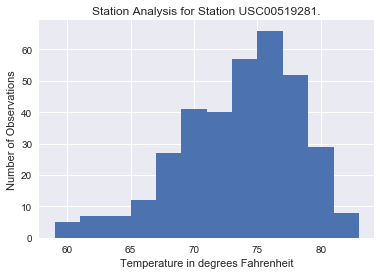

In [55]:
#Plot the results as a histogram with bins=12.

plt.hist(tobs_df['tobs'],12)
plt.xlabel("Temperature in degrees Fahrenheit")
plt.ylabel("Number of Observations")
plt.title(f"Station Analysis for Station {most_active_station}.")
plt.show()

### Temperature Analysis

* Write a function called `calc_temps` that will accept a start date and end date in the format `%Y-%m-%d` and return the minimum, average, and maximum temperatures for that range of dates.

* Use the `calc_temps` function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

* Plot the min, avg, and max temperature from your previous query as a bar chart.

  * Use the average temperature as the bar height.

  * Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).


In [45]:
# Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d and return the minimum, average, and maximum temperatures for that range of dates.

def calc_temps(start_date, end_date):
    return session.query(func.min(measurements.tobs), func.avg(measurements.tobs), func.max(measurements.tobs)).\
        filter(measurements.date >= start_date).filter(measurements.date <= end_date).all()


In [47]:
#Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

trip_temperature_range = (calc_temps('2017-02-15', '2017-02-20'))
trip_temperature_range

[(65, 71.45714285714286, 77)]

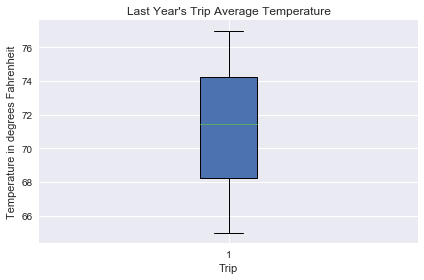

In [56]:
fig, ax = plt.subplots()
x = range(len(trip_temperature_range))
ax.boxplot(trip_temperature_range, patch_artist=True)
ax.set_title("Last Year's Trip Average Temperature")
ax.set_ylabel("Temperature in degrees Fahrenheit")
ax.set_xlabel("Trip")
fig.tight_layout()
plt.show()

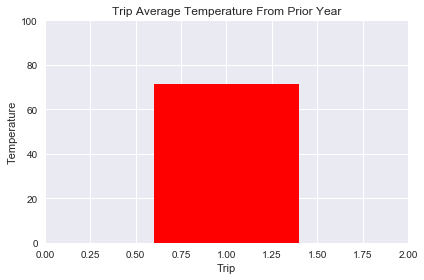

In [59]:
#Plot the min, avg, and max temperature from your previous query as a bar chart.

#Use the average temperature as the bar height.

#Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

ave_temp = trip_temperature_range[0][1]
min_temp = trip_temperature_range[0][0]
max_temp = trip_temperature_range[0][2]

fig, ax = plt.subplots()
bar_chart = ax.bar(1 , ave_temp, color= 'red')
ax.set_xlabel("Trip")
ax.set_ylabel("Temperature in degrees Fahrenheit")
ax.set_title("Last Year's Trip Average Temperature")

        
#label bars 
plt.ylim(0, 100)
plt.xlim(0,2)
fig.tight_layout()
plt.show()